In [9]:
import torch
from torch import nn
import torchvision
import matplotlib.pyplot as plt
import random
import glob

In [2]:
device = "mps" if torch.backends.mps.is_available() else "cpu"

print(f"Device: {device}!")

Device: mps!


In [4]:
num_classes = 46
patch_size = 4
img_size = 32
in_channels = 1
num_heads = 8
dropout = 0.001
hidden_dim = 1024
activation = "gelu"
num_encoders = 4
embed_dim = (patch_size ** 2) * in_channels # 16
num_patches = (img_size // patch_size) ** 2 # 64

In [5]:
from vision_transformer import VisionTransformer

model = VisionTransformer(num_patches, img_size, num_classes, patch_size, embed_dim, num_encoders, num_heads, hidden_dim, dropout, activation, in_channels).to(device)
model.load_state_dict(torch.load("models/hindi-character-recognition-40epochs"))
model.eval()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.norm_first was True
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


VisionTransformer(
  (embeddings_block): PatchEmbedding(
    (patcher): Sequential(
      (0): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
      (1): Flatten(start_dim=2, end_dim=-1)
    )
    (dropout): Dropout(p=0.001, inplace=False)
  )
  (encoder_blocks): TransformerEncoder(
    (layers): ModuleList(
      (0-3): 4 x TransformerEncoderLayer(
        (self_attn): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
        )
        (linear1): Linear(in_features=16, out_features=2048, bias=True)
        (dropout): Dropout(p=0.001, inplace=False)
        (linear2): Linear(in_features=2048, out_features=16, bias=True)
        (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
        (dropout1): Dropout(p=0.001, inplace=False)
        (dropout2): Dropout(p=0.001, inplace=False)
      )
    )
  )
  (mlp_head): Sequential(
    (0): LayerN

In [89]:
image_path = "data/test/character_2_kha"

image_path_list= glob.glob(f"{image_path}/*.png")

random_image_path = random.choice(image_path_list)

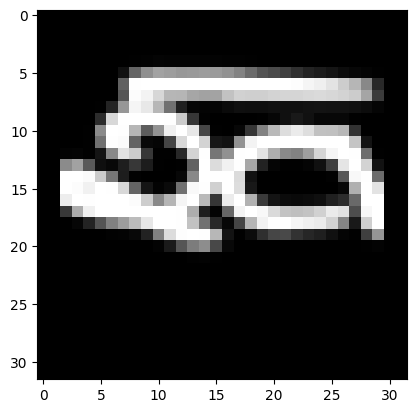

In [90]:
input_img = torchvision.io.read_image(random_image_path)

plt.imshow(input_img.permute(1, 2, 0), cmap = "gray")

input_img = input_img.float().to(device).unsqueeze(0) # unsqueezing to account for batch size

In [91]:
with torch.no_grad():
    pred = model(input_img)
    
pred = pred.detach().cpu()

In [92]:
pred_label = torch.argmax(pred, dim = 1)

In [93]:
pred_label

tensor([43])

In [ ]:
label_to_digit = {
    43 : "क",
}